## Regresion Logistica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Luis/Desktop/framingham.csv", sep=",")

In [3]:
data.dropna(inplace=True)

In [4]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
datos = data[["TenYearCHD", "totChol"]]
datos.head()

,TenYearCHD,totChol
0,0,195.0
1,0,250.0
2,0,245.0
3,1,225.0
4,0,285.0


In [6]:
datos.TenYearCHD.value_counts().sort_index()

0    3099
1     557
Name: TenYearCHD, dtype: int64

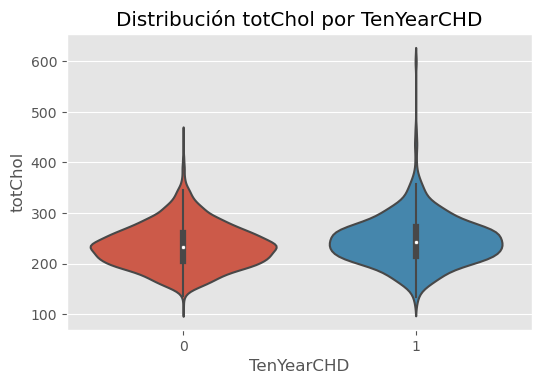

In [7]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'TenYearCHD',
        y     = 'totChol',
        data  = datos,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución totChol por TenYearCHD');

In [8]:
res_ttest = ttest_ind(
                x1 = datos.loc[datos["TenYearCHD"]==0, "totChol"],
                x2 = datos.loc[datos["TenYearCHD"]==1, "totChol"],
                alternative='two-sided'
            )
print(f"t={res_ttest[0]}, p-value={res_ttest[1]}")

t=-5.531474439833636, p-value=3.398308583622179e-08


In [9]:
X = datos[['totChol']]
y = datos['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
)

In [10]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.Logit(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.434258
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 2924
Model:                          Logit   Df Residuals:                     2922
Method:                           MLE   Df Model:                            1
Date:                Mon, 18 Sep 2023   Pseudo R-squ.:                 0.01251
Time:                        13:25:43   Log-Likelihood:                -1269.8
converged:                       True   LL-Null:                       -1285.9
Covariance Type:            nonrobust   LLR p-value:                 1.407e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1747      0.275    -11.540      0.000      -3.714      -2.636
x1             0.0063      0.

In [11]:
predicciones = modelo.predict(exog = X_train)

clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
grid_X = np.linspace(
            start = min(datos.totChol),
            stop  = max(datos.totChol),
            num   = 200
         ).reshape(-1,1)

grid_X = sm.add_constant(grid_X, prepend=True)
predicciones = modelo.predict(exog = grid_X)

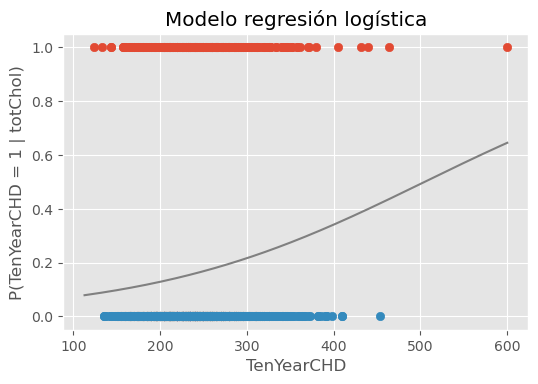

In [14]:
fig, ax = plt.subplots(figsize=(6, 3.84))

ax.scatter(
    X_train[(y_train == 1).flatten(), 1],
    y_train[(y_train == 1).flatten()].flatten()
)
ax.scatter(
    X_train[(y_train == 0).flatten(), 1],
    y_train[(y_train == 0).flatten()].flatten()
)
ax.plot(grid_X[:, 1], predicciones, color = "gray")
ax.set_title("Modelo regresión logística")
ax.set_ylabel("P(TenYearCHD = 1 | totChol)")
ax.set_xlabel("TenYearCHD");

In [15]:
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 87.8415300546448%


In [16]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0
Real,
0,643
1,89


## Analisis Regresion Logistica

##### El resultado obtenido de acuerdo con la problemática planteada para predecir enfermedades cardíacas implica la selección de dos variables: el Riesgo de enfermedad coronaria a 10 años y el nivel de colesterol. Con base en estos datos, podemos concluir que las personas con niveles de colesterol muy altos tienen un riesgo significativo de desarrollar una enfermedad coronaria en un período de 10 años.
##### En el proceso de regresión logística en Python, después de cargar los datos, ajustar el modelo y realizar pruebas, obtuvimos un resultado que respalda esta afirmación. La exactitud del modelo alcanzó un 87.841%, lo que significa que aproximadamente el 87.841% de las muestras en el conjunto de prueba fueron clasificadas correctamente por el modelo.
